In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
df = pd.read_csv('titanic.csv')

In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In our dataset

1. Age : Data are not missing completely at random
2. Cabin : Data Are not missing completely at random
3. Embarked : Data is missing completely at random

## We used capturing NAN values with new feature

In [23]:
def func(df, variable):
    df[variable+'_nan'] = np.where(df[variable].isnull(),1,0)

In [24]:
func(df, 'Age')
func(df, 'Cabin')

In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_nan,Cabin_nan
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


<Axes: xlabel='Age', ylabel='Count'>

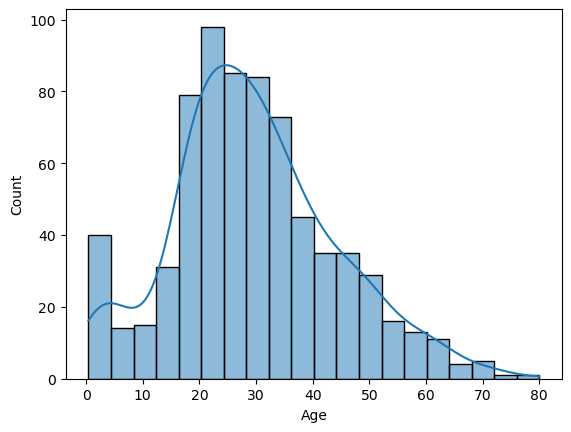

In [29]:
sns.histplot(x=df.Age, kde=True)

In [30]:
df['Age'].fillna(df.Age.median(), inplace=True)

<Axes: xlabel='Age', ylabel='Count'>

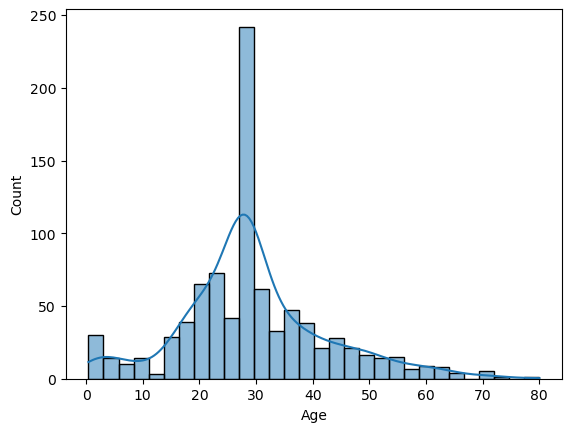

In [39]:
sns.histplot(df.Age, kde=True)

In [31]:
# We filled the nan values in Embarked by using mode because the value is missing completely at random
emb_mode = df.Embarked.mode()
emb_mode

0    S
Name: Embarked, dtype: object

In [32]:
df['Embarked'].fillna('S', inplace=True)

In [33]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Age_nan          0
Cabin_nan        0
dtype: int64

In [34]:
most_frequent_category = df.Cabin.mode()
most_frequent_category

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object

In [35]:
df['Cabin'].fillna('B96', inplace=True)

In [36]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Age_nan        0
Cabin_nan      0
dtype: int64

## Encoding

#### Label Encoding for Ordinal data

In [103]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = df.select_dtypes(include=['object'])
categorical_columns
column_name = ['Sex', 'Embarked']
categorical_columns = categorical_columns.drop(column_name, axis = 1)
# Fit and transform the 'Name' column
for i in categorical_columns:
    df[i] = label_encoder.fit_transform(df[i])

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_nan,Cabin_nan
0,1,0,3,108,male,22.0,1,0,523,7.2500,47,S,0,1
1,2,1,1,190,female,38.0,1,0,596,71.2833,82,C,0,0
2,3,1,3,353,female,26.0,0,0,669,7.9250,47,S,0,1
3,4,1,1,272,female,35.0,1,0,49,53.1000,56,S,0,0
4,5,0,3,15,male,35.0,0,0,472,8.0500,47,S,0,1


#### One hot encoding for nominal data

In [43]:
encoded_df = pd.get_dummies(df, columns=['Sex','Embarked'],drop_first=True)
# Convert boolean values to numerical values (1 for True, 0 for False)
encoded_df[['Sex_male','Embarked_Q','Embarked_S']] = encoded_df[['Sex_male','Embarked_Q','Embarked_S']].astype(int)
encoded_df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Age_nan,Cabin_nan,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,108,22.0,1,0,523,7.2500,47,0,1,1,0,1
1,2,1,1,190,38.0,1,0,596,71.2833,82,0,0,0,0,0
2,3,1,3,353,26.0,0,0,669,7.9250,47,0,1,0,0,1
3,4,1,1,272,35.0,1,0,49,53.1000,56,0,0,0,0,1
4,5,0,3,15,35.0,0,0,472,8.0500,47,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,27.0,0,0,101,13.0000,47,0,1,1,0,1
887,888,1,1,303,19.0,0,0,14,30.0000,30,0,0,0,0,1
888,889,0,3,413,28.0,1,2,675,23.4500,47,1,1,0,0,1
889,890,1,1,81,26.0,0,0,8,30.0000,61,0,0,1,0,0


## Let's build the model

In [123]:
# Lets train the model
X = encoded_df.drop(columns = 'Survived')
y = encoded_df['Survived']

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state =0)

# Build the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# # Define the parameter grid
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

model = RandomForestClassifier(max_depth =  None, min_samples_leaf =  1, min_samples_split =  2, n_estimators =  300)

# # Perform GridSearchCV
# grid_search = GridSearchCV(estimator= model, param_grid=param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X, y)

# # Print the best parameters and best score
# print("Best Parameters: ", grid_search.best_params_)
# print("Best Score: ", grid_search.best_score_)

In [124]:

model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [125]:
from sklearn.metrics import confusion_matrix, accuracy_score,recall_score, precision_score, classification_report,f1_score
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[103   7]
 [ 17  52]]
0.8659217877094972
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       110
           1       0.88      0.75      0.81        69

    accuracy                           0.87       179
   macro avg       0.87      0.84      0.85       179
weighted avg       0.87      0.87      0.86       179

